In [3]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import cv2 # image processing tassk
import numpy as np # numerical operations
from ultralytics import YOLO # object detection model
import matplotlib.pyplot as plt # plotting visualizations

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
image_path = '/content/person-walking-image.png'

In [13]:
# Load YOLO (you-only-look-once) model
model = YOLO('yolov8n.pt')

# Read image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform detection
results = model(image_rgb)[0]

# Create a copy of the image for drawing
annotated_image = image_rgb.copy()

# Generate random colors for classes
np.random.seed(42)
colors = np.random.randint(0, 255, size=(100,3), dtype=np.uint8)

# Process detections
boxes = results.boxes


0: 480x640 10 persons, 3 handbags, 4 suitcases, 249.6ms
Speed: 11.5ms preprocess, 249.6ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)


In [14]:
# Hold class names and their corresponding colors
class_labels = {}

# Process each detected object and apply confidence threshold filtering
for box in boxes:
  # Get box coordinates
  x1, y1, x2, y2 = map(int, box.xyxy[0])

  # Get confidence score
  confidence = float(box.conf[0])

  # Only show detections above confidence threshold
  if confidence > 0.2:
    # Get class id and name
    class_id = int(box.cls[0])
    class_name = results.names[class_id]

    # Get color for this class
    color = colors[class_id % len(colors)].tolist()

    # Draw bounding box
    cv2.rectangle(annotated_image, (x1, y1), (x2, y2), color, 2)

    # Store class name and color for legend
    class_labels[class_name] = color

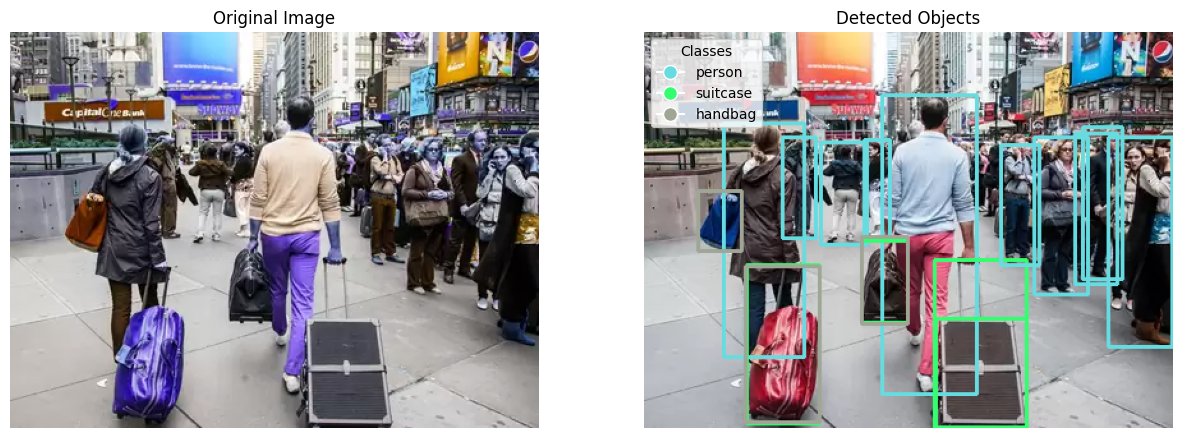

In [16]:
# Create figure
plt.figure(figsize=(15, 7))

# Show original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Show detection results
plt.subplot(1, 2, 2)
plt.title('Detected Objects')
plt.imshow(annotated_image)
plt.axis('off')

# Create legend
legend_handles = []
for class_name, color in class_labels.items():
    normalized_color = np.array(color) / 255.0 # Normalize the color
    legend_handles.append(plt.Line2D([0], [0], marker='o',
                                     color='w', label=class_name,
                                     markerfacecolor=normalized_color,
                                     markersize=10))

plt.legend(handles=legend_handles, loc='upper left', title='Classes')
plt.show()